In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl

from pycircstat2 import Circular, load_data

# Circular Statistics in R (Pewsey, et al., 2014)

## Chapter 2

### Figure 2.1 Linear plot v.s. Circular plot

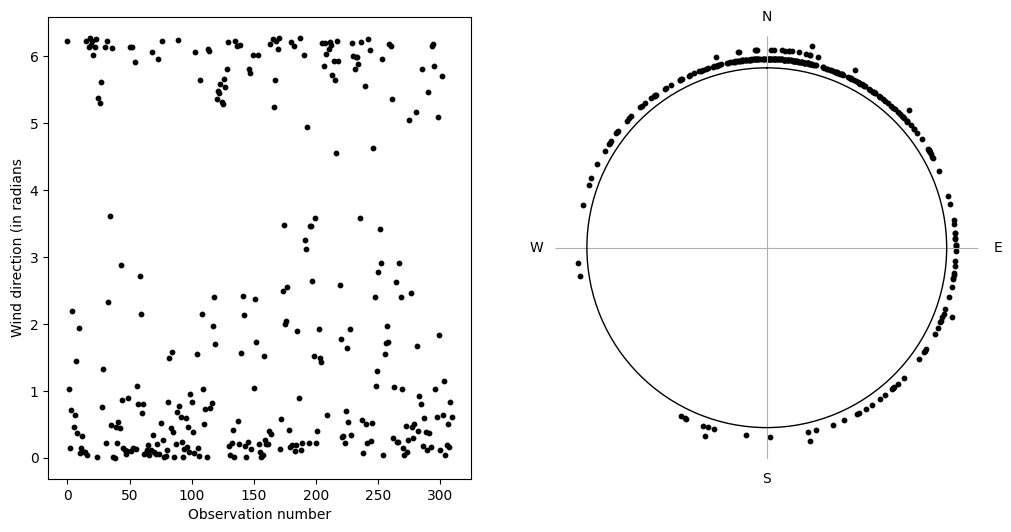

In [2]:
d21 = load_data('wind', source='pewsey')['x'].values
c21 = Circular(data=d21, unit='radian')

fig, ax = plt.subplot_mosaic(mosaic="ab", figsize=(12, 6), per_subplot_kw={'b': {'projection': 'polar'}})

ax['a'].scatter(np.arange(len(d21)), d21, s=10, color='black')
ax['a'].set_xlabel('Observation number')
ax['a'].set_ylabel('Wind direction (in radians')

c21.plot(
    ax=ax['b'],
    config={
        "rose": False,
        "mean": False,
        "median": False,
        "density": False,
        "r_max_scatter": 1,
        "scatter": {"color": "black"}
    }    
)

from matplotlib import ticker

position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
labels = ['N', 'E', 'S', 'W']
ax['b'].xaxis.set_major_locator(ticker.FixedLocator(position_major))
ax['b'].xaxis.set_major_formatter(ticker.FixedFormatter(labels))


### Figure 2.2

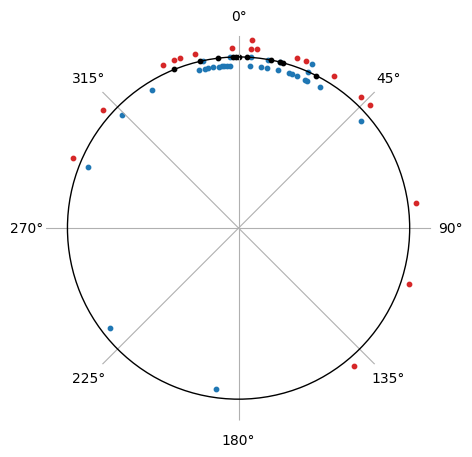

In [3]:
d22 = load_data('B10', source='fisher')

c22s1 = Circular(data=d22[d22['set'] == 1]['θ'], unit='degree', )
c22s2 = Circular(data=d22[d22['set'] == 2]['θ'], unit='degree')
c22s3 = Circular(data=d22[d22['set'] == 3]['θ'], unit='degree')

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})

c22s2.plot(
    ax=ax,
    config={
        "rose": False,
        "density": False,
        "mean": False,
        "median": False,
        "scatter": {
            "color": "C0",
            "r_start": 0.9,
        }
    }
)


c22s1.plot(
    ax=ax,
    config={
        "rose": False,
        "density": False,
        "mean": False,
        "median": False,
        "scatter": {
            "color": "black",
            "r_start": 0.95,
        }
    }
)


c22s3.plot(
    ax=ax,
    config={
        "rose": False,
        "density": False,
        "mean": False,
        "median": False,
        "scatter": {
            "color": "C3",
            "r_start": 1,
        }
    }
)


### Figure 2.3 Circular plot with rose diagram

True


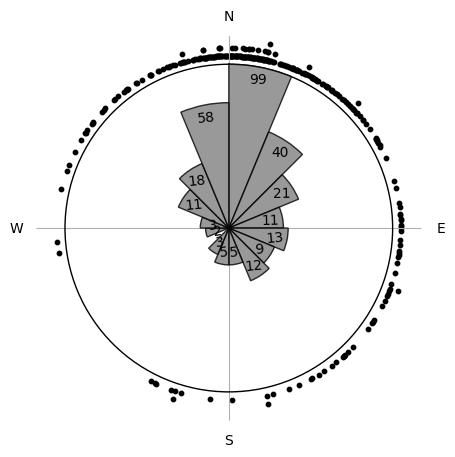

In [4]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})


c21.plot(
    ax=ax,
    config={
        "figsize": (4,4),
        "rose": {"bins": 16, "counts": True},
        "density": False,
        "mean": False,
        "median": False,
    }
)

from matplotlib import ticker

position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
labels = ['N', 'E', 'S', 'W']
ax.xaxis.set_major_locator(ticker.FixedLocator(position_major))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))


### Figure 2.4 Circular plot with rose diagrams and three kernel density estimates

False
False
False
False


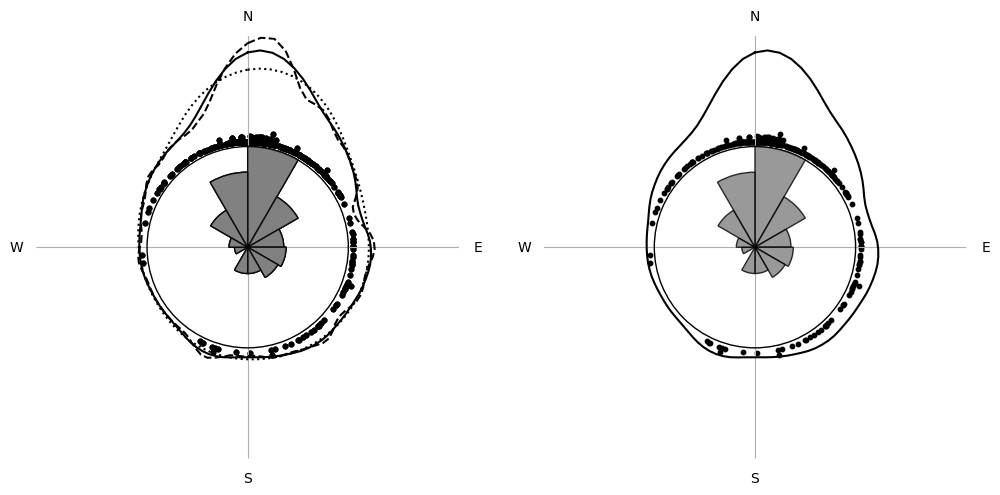

In [5]:
d21 = load_data('wind', source='pewsey')['x'].values
c21 = Circular(data=d21, unit='radian')

fig, ax = plt.subplot_mosaic(mosaic="ab", figsize=(12, 6), subplot_kw={'projection': 'polar'})

h0s = [0.2, 0.4, 0.75]
lss = ['dashed', 'solid', 'dotted']

for h0, ls in zip(h0s, lss):

    c21.plot(
        ax=ax['a'],
        config={
            "rose": True,
            "density": {
                'method': 'nonparametric',
                'h0': h0,
                "color": 'black',
                'linestyle':ls,
            },
            "mean": False,
            "median": False,
            "radius": {"lim_max": 2.1}
        }
    )

c21.plot(
    ax=ax['b'],
    config={
        "rose": True,
        "density": {
            'method': 'nonparametric',
            'h0': 0.4,
            "color": 'black',
            'linestyle':'solid',
        },
        "mean": False,
        "median": False,
        "radius": {"lim_max": 2.1}
    }
)

from matplotlib import ticker

position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
labels = ['N', 'E', 'S', 'W']

for s in ['a', 'b']:
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))
    ax[s].xaxis.set_major_formatter(ticker.FixedFormatter(labels))


## Chapter 3 Circular Summary Statistics

#### 3.2 Sample Trigonometric Moments

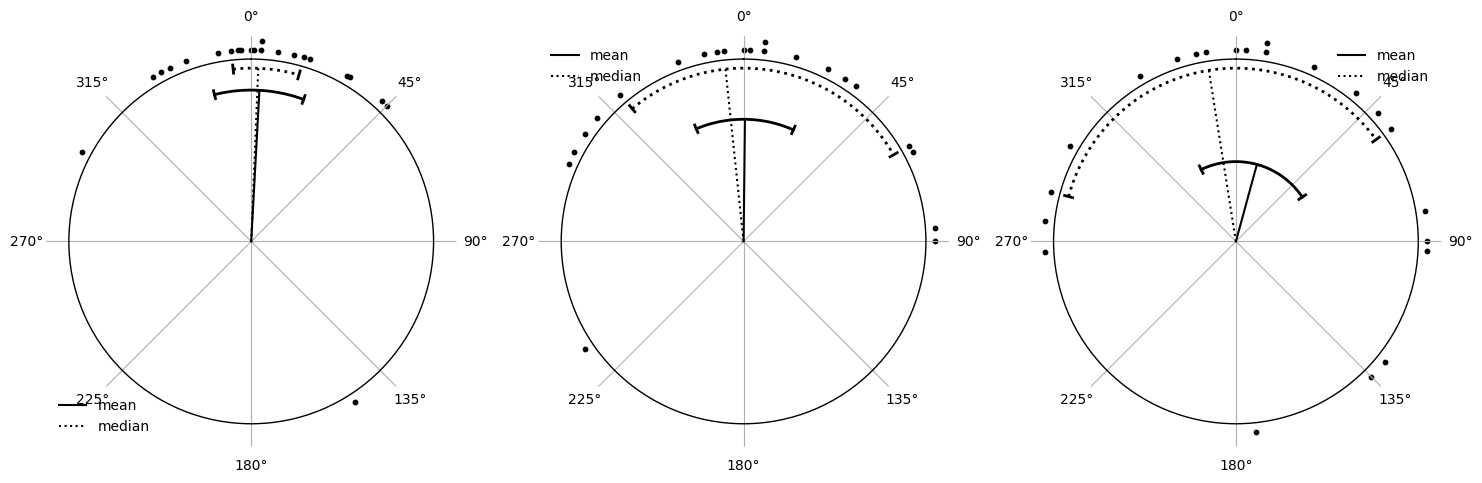

In [6]:
b11 = load_data('B11', source='fisher')["θ"].values
c11_1 = Circular(data=b11, unit='degree', kwargs_mean_ci={"method": "approximate"})
c11_2 = Circular(data=b11*2, unit='degree', kwargs_mean_ci={"method": "approximate"})
c11_3 = Circular(data=b11*3, unit='degree', kwargs_mean_ci={"method": "approximate"})

fig, ax = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection="polar"))
for i, c in enumerate([c11_1, c11_2, c11_3]):
    c.plot(
        ax=ax[i],
        config={
            "rose": False,
            "density": False,
            "mean": True,
            "median": True,
        }
    )

In [7]:
from pycircstat2.descriptive import circ_mean, circ_moment, convert_moment, compute_C_and_S

m1, r1 = convert_moment(circ_moment(c11_1.alpha, p=1))
C1, S1 = compute_C_and_S(c11_1.alpha, w=np.ones_like(b11), p=1)

print(f"θ={np.rad2deg(m1).round(1)}°, r={r1.round(2)}, a1={C1.round(2)}, b1={S1.round(2)}")

m2, r2 = convert_moment(circ_moment(c11_1.alpha, p=2))
C2, S2 = compute_C_and_S(c11_1.alpha, w=np.ones_like(b11), p=2)

print(f"θ={np.rad2deg(m2).round(2)}°, r={r2.round(2)}, a1={C2.round(2)}, b1={S2.round(2)}")

C3, S3 = compute_C_and_S(c11_1.alpha, w=np.ones_like(b11), p=2, mean=m1)

print(f"a1={C3.round(2)}, b1={S3.round(2)}")

print(m1 == circ_mean(c11_1.alpha))


θ=3.1°, r=0.83, a1=0.83, b1=0.04
θ=0.64°, r=0.67, a1=0.67, b1=0.01
a1=0.67, b1=-0.06
True


In [8]:
from pycircstat2.descriptive import circ_median

md = np.rad2deg(circ_median(c11_1.alpha, method="deviation", return_average=True))
print(f"median={md.round(1)}°")

median=2.3°


In [9]:
from pycircstat2.descriptive import circ_r

r = circ_r(c11_1.alpha)
print(f"r={r.round(2)}")

r=0.83


In [10]:
from pycircstat2.descriptive import circ_std

V = 1-circ_r(c11_1.alpha) 
σ = circ_std(c11_1.alpha)
print(f"V={V.round(2)}, σ={σ.round(2)}")


V=0.17, σ=0.61


In [11]:
from pycircstat2.descriptive import circ_mean_deviation

d1 = 1 - r**2
d2 = np.min(circ_mean_deviation(c11_1.alpha, c11_1.alpha))
print(f"d1={d1.round(2)}, d2={d2.round(2)}")

d1=0.31, d2=0.43


In [12]:
from pycircstat2.descriptive import circ_skewness, circ_kurtosis

circ_skewness(c11_1.alpha).round(2), circ_kurtosis(c11_1.alpha).round(2)

(np.float64(-0.92), np.float64(6.64))

## Chapter 4 Circular Models

In [13]:
from pycircstat2.distributions import cardioid, cartwright, jonespewsey, vonmises, vonmises_flattopped, wrapnorm, wrapcauchy

### Figure 4.1

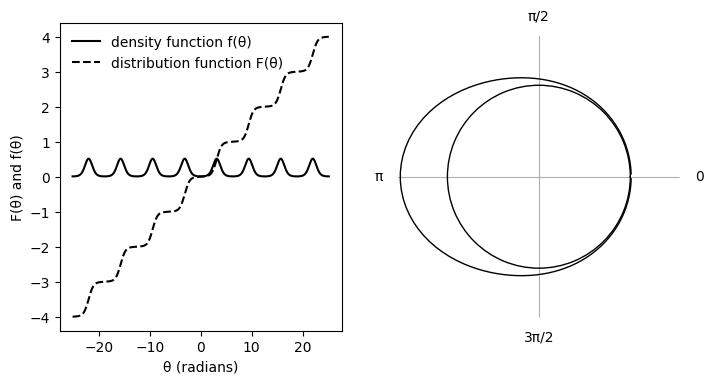

In [14]:
mu = np.deg2rad(180)
kappa = 2
x = np.linspace(-8 * np.pi, 8 * np.pi, 800)
vm = vonmises(mu=mu, kappa=2)
f = vm.pdf(x)
F = vm.cdf(x)

fig, ax = plt.subplot_mosaic(mosaic='ab', figsize=(8,4), per_subplot_kw={'b': {'projection': 'polar'}})
ax['a'].plot(x, f, color='black', label="density function f(θ)")
ax['a'].plot(x, F, color='black', linestyle='--', label="distribution function F(θ)")
ax['a'].set_xlabel('θ (radians)')
ax['a'].set_ylabel('F(θ) and f(θ)')
ax['a'].legend(frameon=False)

ax['b'].plot(x[400:500], f[400:500] + 1, color='black',
    linestyle='-', lw=1, label='vonmises pdf')
rtick = [0, 1]
ax['b'].spines["polar"].set_visible(False)
ax['b'].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax['b'].yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
ax['b'].xaxis.set_major_locator(ticker.FixedLocator(position_major))

labels = ['0', 'π/2', 'π', '3π/2']
ax['b'].xaxis.set_major_formatter(ticker.FixedFormatter(labels))


### Figure 4.3

Text(0.5, 1.0, 'μ = π/2')

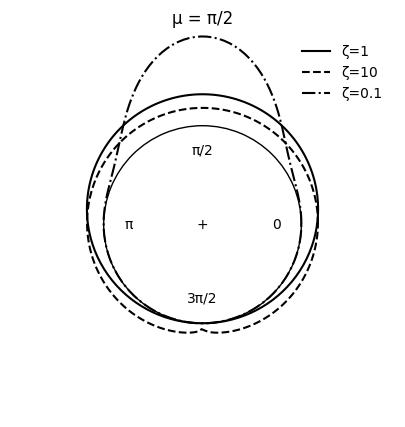

In [15]:
n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})

ax.plot(x, cartwright.pdf(x, zeta=1, mu=np.pi/2) + 1, linestyle='-', color='black', label='ζ=1')
ax.plot(x, cartwright.pdf(x, zeta=10, mu=np.pi/2) + 1, linestyle='--', color='black', label='ζ=10')
ax.plot(x, cartwright.pdf(x, zeta=0.1, mu=np.pi/2) + 1, linestyle='-.', color='black', label='ζ=0.1')

rtick = [0, 1]
ax.spines["polar"].set_visible(False)
ax.set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax.yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

# position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = []
ax.xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax.text(x=0, y=0, s='+', ha='center', va="center", color="black",)
labels = ['0', 'π/2', 'π', '3π/2']
for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
    ax.text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black")

ax.legend(frameon=False)
ax.set_title('μ = π/2')



### Figure 4.4

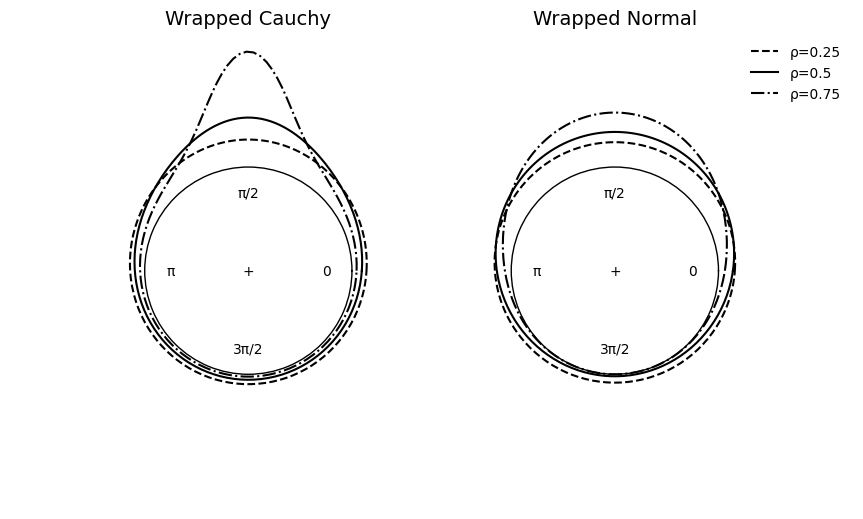

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10, 5), subplot_kw={'projection': 'polar'})

ax[0].plot(x, wrapcauchy.pdf(x, rho=0.25, mu=mu) + 1, linestyle='--', color='black', label='ρ=0.25')
ax[0].plot(x, wrapcauchy.pdf(x, rho=0.5,  mu=mu) + 1, linestyle='-', color='black', label='ρ=0.5')
ax[0].plot(x, wrapcauchy.pdf(x, rho=0.75, mu=mu) + 1, linestyle='-.', color='black', label='ρ=0.75')


ax[1].plot(x, wrapnorm.pdf(x, rho=0.25, mu=mu) + 1, linestyle='--', color='black', label='ρ=0.25')
ax[1].plot(x, wrapnorm.pdf(x, rho=0.5,  mu=mu) + 1, linestyle='-', color='black', label='ρ=0.5')
ax[1].plot(x, wrapnorm.pdf(x, rho=0.75, mu=mu) + 1, linestyle='-.', color='black', label='ρ=0.75')

titles = ['Wrapped Cauchy', 'Wrapped Normal']
for i in range(2):
    rtick = [0, 1]
    ax[i].spines["polar"].set_visible(False)
    ax[i].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[i].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    # position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
    position_major = []
    ax[i].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[i].text(x=0, y=0, s='+', ha='center', va="center", color="black",)
    labels = ['0', 'π/2', 'π', '3π/2']
    for j, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
        ax[i].text(x=angle, y=0.75, s=labels[j], ha='center', va="center", color="black",)

    ax[i].set_ylim(0, 2.3)
    ax[i].set_title(f"{titles[i]}", fontsize=14)

    if i == 1:
        ax[i].legend(frameon=False)

fig.subplots_adjust(wspace=0., hspace=0, left=-.75, top=0.15,right=0.,bottom=0.)
fig.tight_layout(pad=0)

### Figure 4.5 von Mises / cardioid / wrapped normal / wrapped Cauchy

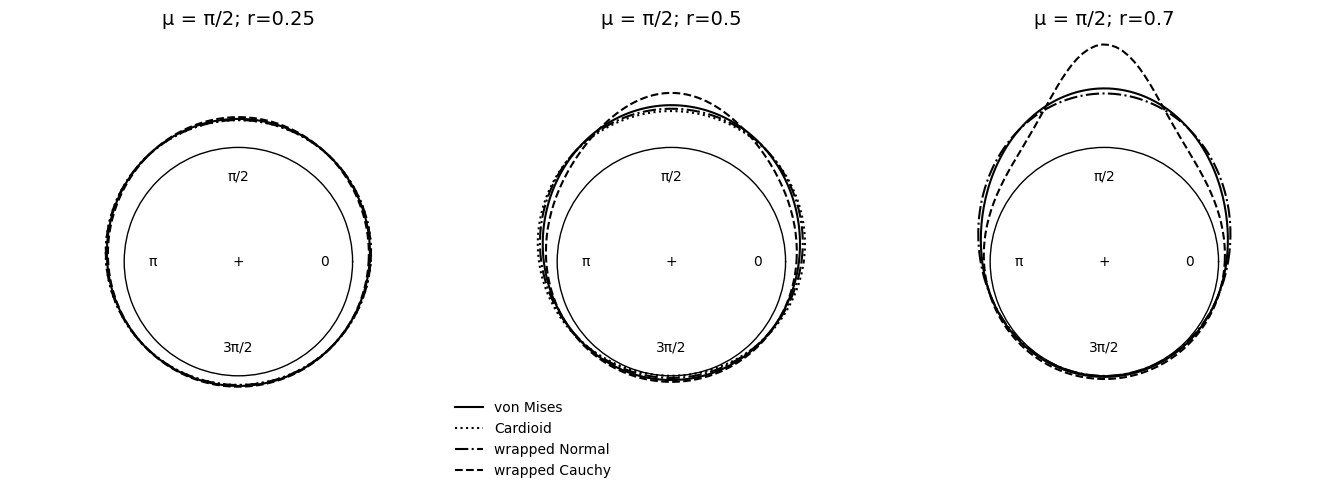

In [17]:
from pycircstat2.descriptive import circ_kappa
n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplots(1,3, figsize=(15, 5), subplot_kw={'projection': 'polar'})

r = 0.25

ax[0].plot(x, vonmises.pdf(x, kappa=circ_kappa(r=r, n=n), mu=mu) + 1, linestyle='-', color='black')
ax[0].plot(x, cardioid.pdf(x, rho=r, mu=mu) + 1, linestyle=':', color='black')
ax[0].plot(x, wrapnorm.pdf(x, rho=r, mu=mu) + 1, linestyle='-.', color='black')
ax[0].plot(x, wrapcauchy.pdf(x, rho=r, mu=mu) + 1, linestyle='--', color='black')

r = 0.5
ax[1].plot(x, vonmises.pdf(x, kappa=circ_kappa(r=r, n=n), mu=mu) + 1, linestyle='solid', color='black', label='von Mises')
ax[1].plot(x, cardioid.pdf(x, rho=r, mu=mu) + 1, linestyle=':', color='black', label='Cardioid')
ax[1].plot(x, wrapnorm.pdf(x, rho=r, mu=mu) + 1, linestyle='-.', color='black', label='wrapped Normal')
ax[1].plot(x, wrapcauchy.pdf(x, rho=r, mu=mu) + 1, linestyle='--', color='black',label='wrapped Cauchy')


r = 0.7
ax[2].plot(x, vonmises.pdf(x, kappa=circ_kappa(r=r, n=n), mu=mu) + 1, linestyle='-', color='black')
ax[2].plot(x, wrapnorm.pdf(x, rho=r, mu=mu) + 1, linestyle='-.', color='black', )
ax[2].plot(x, wrapcauchy.pdf(x, rho=r, mu=mu) + 1, linestyle='--', color='black')

rs = [0.25, 0.5, 0.7]
for j in range(3):
    rtick = [0, 1]
    ax[j].spines["polar"].set_visible(False)
    ax[j].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[j].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    # position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
    position_major = []
    ax[j].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[j].text(x=0, y=0, s='+', ha='center', va="center", color="black",)
    labels = ['0', 'π/2', 'π', '3π/2']
    for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
        ax[j].text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black",)

    ax[j].set_ylim(0, 2)
    ax[j].set_title(f"μ = π/2; r={rs[j]}", fontsize=14)

    if j == 1:
        ax[j].legend(frameon=False)

fig.subplots_adjust(wspace=0., hspace=0, left=-.75, top=0.15,right=0.,bottom=0.)
fig.tight_layout(pad=0)

### Figure 4.6

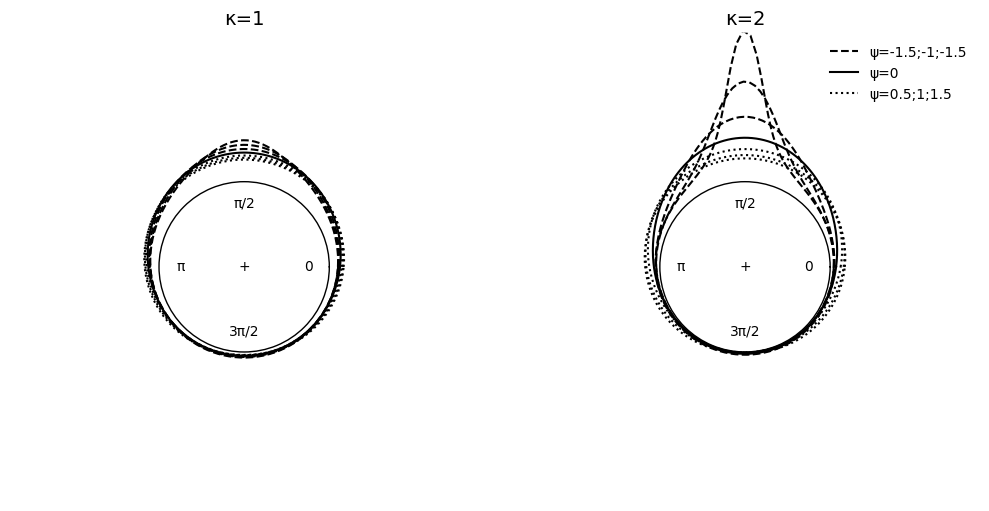

In [18]:
n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplots(1,2, figsize=(10,5), subplot_kw={'projection': 'polar'}, layout='constrained')

ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=-3/2, mu=mu) + 1, linestyle='--', color='black', label='ψ=-1.5;-1;-2')
ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=-1, mu=mu) + 1, linestyle='--', color='black')
ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=-1/2, mu=mu) + 1, linestyle='--', color='black')

ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=0, mu=mu) + 1, linestyle='-', color='black', label='ψ=0')

ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=1/2, mu=mu) + 1, linestyle=':', color='black', label='ψ=0.5;1;1.5')
ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=1, mu=mu) + 1, linestyle=':', color='black')
ax[0].plot(x, jonespewsey.pdf(x, kappa=1, psi=3/2, mu=mu) + 1, linestyle=':', color='black')


ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=-3/2, mu=mu) + 1, linestyle='--', color='black', label='ψ=-1.5;-1;-1.5')
ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=-1, mu=mu) + 1, linestyle='--', color='black')
ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=-1/2, mu=mu) + 1, linestyle='--', color='black')

ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=0, mu=mu) + 1, linestyle='-', color='black', label='ψ=0')

ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=1/2, mu=mu) + 1, linestyle=':', color='black', label='ψ=0.5;1;1.5')
ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=1, mu=mu) + 1, linestyle=':', color='black')
ax[1].plot(x, jonespewsey.pdf(x, kappa=2, psi=3/2, mu=mu) + 1, linestyle=':', color='black')

ks = [1, 2]
for j in range(2):
    rtick = [0, 1]
    ax[j].spines["polar"].set_visible(False)
    ax[j].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[j].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[j].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[j].text(x=0, y=0, s='+', ha='center', va="center", color="black",)
    labels = ['0', 'π/2', 'π', '3π/2']
    for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
        ax[j].text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black",)

    ax[j].set_ylim(0, 2.75)
    ax[j].set_title(f"κ={ks[j]}", fontsize=14)

    if j == 1:
        ax[j].legend(frameon=False)


## Figure 4.7

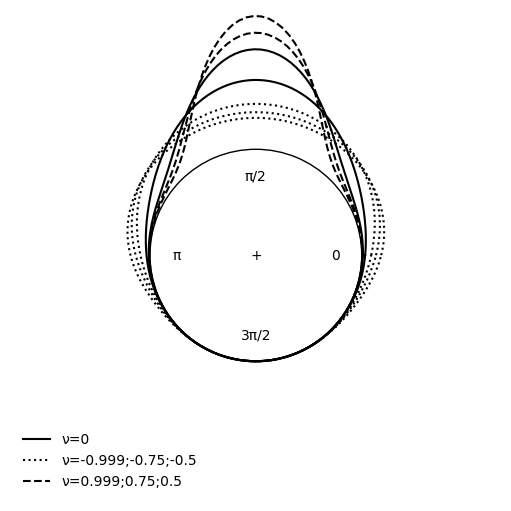

In [19]:
n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'}, layout='constrained')

ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=0, mu=np.pi/2) + 1, linestyle='-', color='black', label='ν=0')

ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=-0.999, mu=np.pi/2) + 1, linestyle=':', color='black', label='ν=-0.999;-0.75;-0.5')
ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=-0.75, mu=np.pi/2) + 1, linestyle=':', color='black')
ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=-0.5, mu=np.pi/2) + 1, linestyle=':', color='black')

ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=0.999, mu=np.pi/2) + 1, linestyle='--', color='black', label='ν=0.999;0.75;0.5')
ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=0.75, mu=np.pi/2) + 1, linestyle='--', color='black')
ax.plot(x, vonmises_flattopped.pdf(x, kappa=3, nu=0.5, mu=np.pi/2) + 1, linestyle='-', color='black')

rtick = [0, 1]
ax.spines["polar"].set_visible(False)
ax.set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
gridlines = ax.yaxis.get_gridlines()
gridlines[-1].set_color("k")
gridlines[-1].set_linewidth(1)

position_major = []
ax.xaxis.set_major_locator(ticker.FixedLocator(position_major))

ax.text(x=0, y=0, s='+', ha='center', va="center", color="black",)
labels = ['0', 'π/2', 'π', '3π/2']
for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
    ax.text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black")

ax.legend(frameon=False)

### Figure 4.8

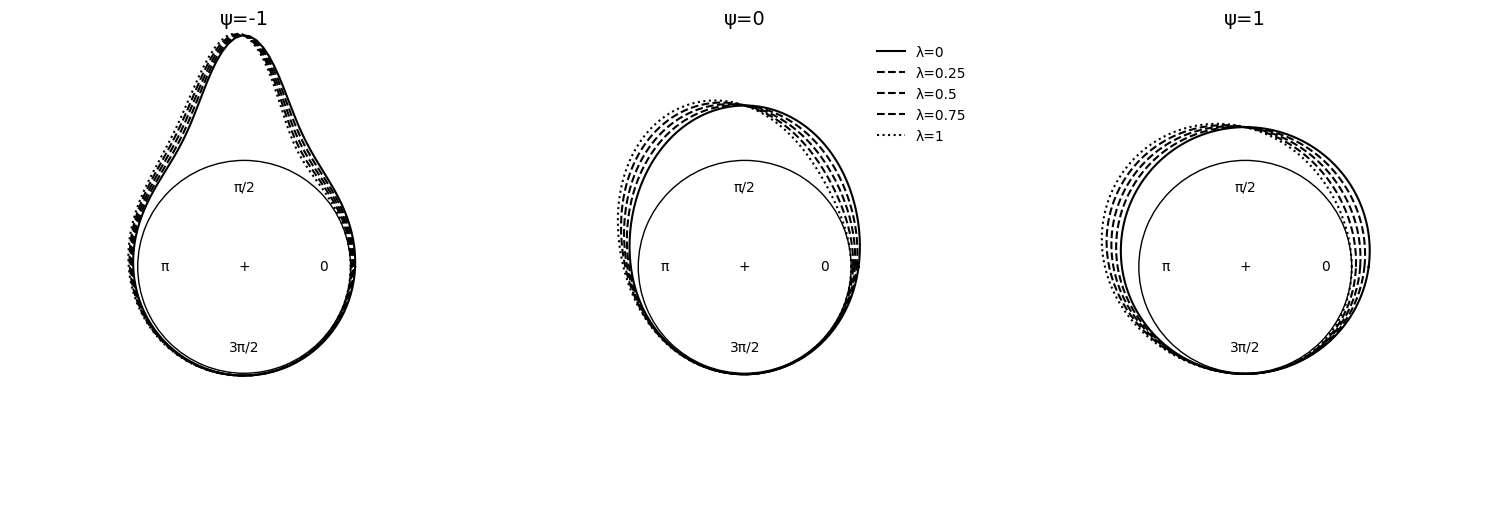

In [20]:
from pycircstat2.distributions import jonespewsey_sineskewed

n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplot_mosaic(mosaic="abc", figsize=(15,5), subplot_kw={'projection': 'polar'},
layout='constrained')

ax['a'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0, xi=mu) + 1, linestyle='-', color='black')
ax['a'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0.25, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0.5, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=0.75, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=-1, lmbd=1, xi=mu) + 1, linestyle=':', color='black')

####


ax['b'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0, xi=mu) + 1, linestyle='-', color='black', label='λ=0')
ax['b'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0.25, xi=mu) + 1, linestyle='--', color='black', label='λ=0.25')
ax['b'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0.5, xi=mu) + 1, linestyle='--', color='black', label='λ=0.5')
ax['b'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=0.75, xi=mu) + 1, linestyle='--', color='black', label='λ=0.75')
ax['b'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=0, lmbd=1, xi=mu) + 1, linestyle=':', color='black', label='λ=1')

####

ax['c'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0, xi=mu) + 1, linestyle='-', color='black')
ax['c'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0.25, xi=mu) + 1, linestyle='--', color='black')
ax['c'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0.5, xi=mu) + 1, linestyle='--', color='black')
ax['c'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=0.75, xi=mu) + 1, linestyle='--', color='black')
ax['c'].plot(x, jonespewsey_sineskewed.pdf(x, kappa=2, psi=1, lmbd=1, xi=mu) + 1, linestyle=':', color='black')

psis = [-1, 0, 1]
for j, s in enumerate(['a', 'b', 'c']):
    rtick = [0, 1]
    ax[s].spines["polar"].set_visible(False)
    ax[s].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[s].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[s].text(x=0, y=0, s='+', ha='center', va="center", color="black",)
    labels = ['0', 'π/2', 'π', '3π/2']
    for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
        ax[s].text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black",)

    ax[s].set_ylim(0, 2.2)
    ax[s].set_title(f"ψ={psis[j]}", fontsize=14)

    if j == 1:
        ax[s].legend(frameon=False)

### Figure 4.9

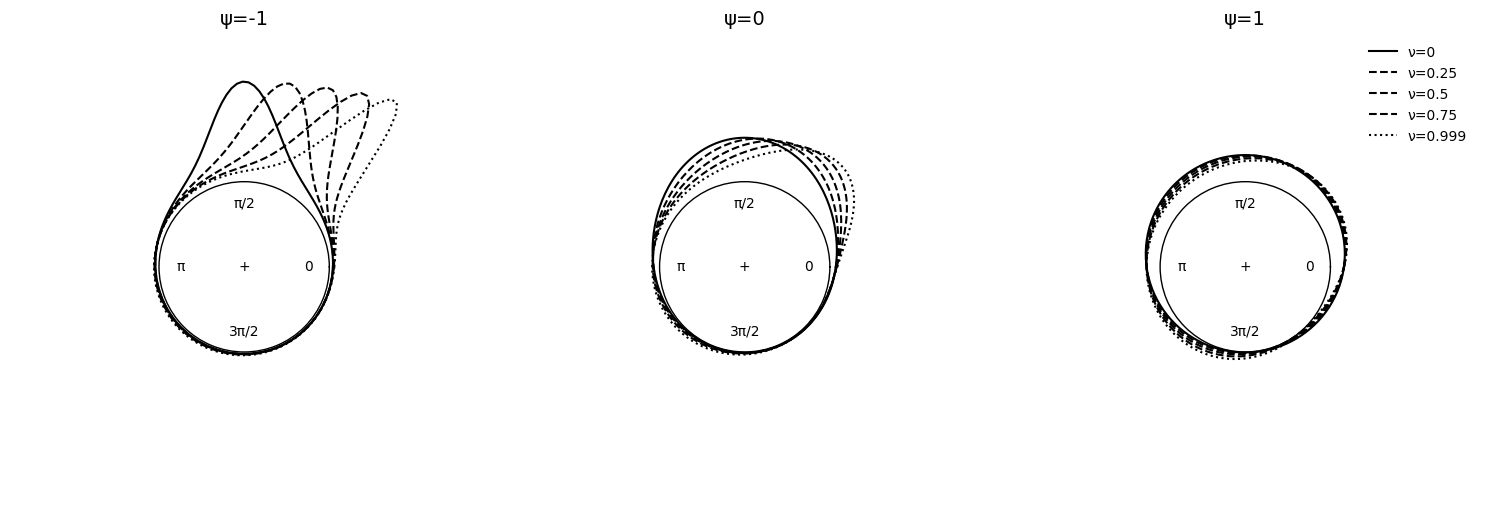

In [21]:
from pycircstat2.distributions import jonespewsey_asym

n = 200
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplot_mosaic("abc", figsize=(15,5), subplot_kw={'projection': 'polar'}, layout='constrained')

### left

ax['a'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=-1, nu=0, xi=mu) + 1, linestyle='-', color='black')
ax['a'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=-1, nu=0.25, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=-1, nu=0.5, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=-1, nu=0.75, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=-1, nu=0.999, xi=mu) + 1, linestyle=':', color='black')

#### mid

ax['b'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=0, nu=0, xi=mu) + 1, linestyle='-', color='black')
ax['b'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=0, nu=0.25, xi=mu) + 1, linestyle='--', color='black')
ax['b'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=0, nu=0.5, xi=mu) + 1, linestyle='--', color='black')
ax['b'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=0, nu=0.75, xi=mu) + 1, linestyle='--', color='black')
ax['b'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=0, nu=0.999, xi=mu) + 1, linestyle=':', color='black')

#### right

ax['c'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=1, nu=0, xi=mu) + 1, linestyle='-', color='black', label='ν=0')
ax['c'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=1, nu=0.25, xi=mu) + 1, linestyle='--', color='black', label='ν=0.25')
ax['c'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=1, nu=0.5, xi=mu) + 1, linestyle='--', color='black', label='ν=0.5')
ax['c'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=1, nu=0.75, xi=mu) + 1, linestyle='--', color='black', label='ν=0.75')
ax['c'].plot(x, jonespewsey_asym.pdf(x, kappa=2, psi=1, nu=0.999, xi=mu) + 1, linestyle=':', color='black', label='ν=0.999')

psis = [-1, 0, 1]
for j, s in enumerate(['a', 'b', 'c']):
    rtick = [0, 1]
    ax[s].spines["polar"].set_visible(False)
    ax[s].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[s].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[s].text(x=0, y=0, s='+', ha='center', va="center", color="black",)
    labels = ['0', 'π/2', 'π', '3π/2']
    for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
        ax[s].text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black",)

    ax[s].set_ylim(0, 2.75)
    ax[s].set_title(f"ψ={psis[j]}", fontsize=14)

    if j == 2:
        ax[s].legend(frameon=False)

### Figure 4.10

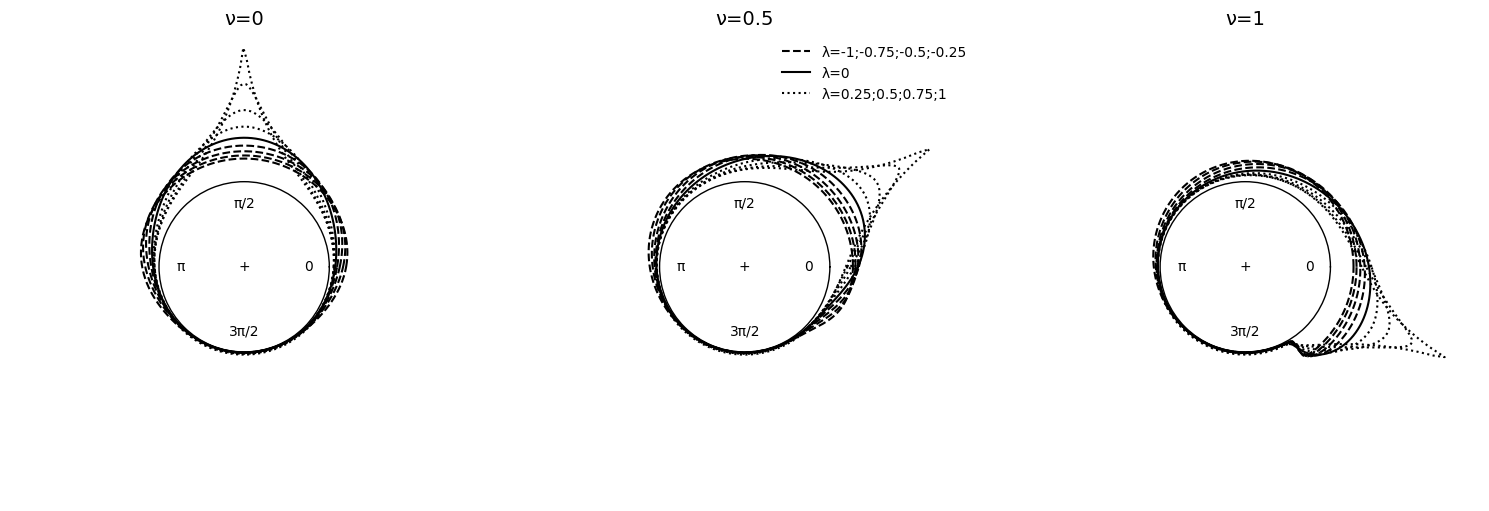

In [22]:
from pycircstat2.distributions import inverse_batschelet

n = 400
x = np.linspace(0, 2 * np.pi, n)
mu = np.pi / 2

fig, ax = plt.subplot_mosaic("abc", figsize=(15,5),subplot_kw={'projection': 'polar'}, layout='constrained')

ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-1., xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-0.75, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-0.5, xi=mu) + 1, linestyle='--', color='black')
ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=-0.25, xi=mu) + 1, linestyle='--', color='black')

ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0, xi=mu) + 1, linestyle='-', color='black')

ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0.25, xi=mu) + 1, linestyle=':', color='black')
ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0.5, xi=mu) + 1, linestyle=':', color='black')
ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=0.75, xi=mu) + 1, linestyle=':', color='black')
ax['a'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0, lmbd=1, xi=mu) + 1, linestyle=':', color='black')

ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-1, xi=mu) + 1, linestyle='--', color='black', label='λ=-1;-0.75;-0.5;-0.25')
ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-0.75, xi=mu) + 1, linestyle='--', color='black')
ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-0.5, xi=mu) + 1, linestyle='--', color='black')
ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=-0.25, xi=mu) + 1, linestyle='--', color='black')

ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0, xi=mu) + 1, linestyle='-', color='black', label='λ=0')

ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0.25, xi=mu) + 1, linestyle=':', color='black', label='λ=0.25;0.5;0.75;1')
ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0.5, xi=mu) + 1, linestyle=':', color='black')
ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=0.75, xi=mu) + 1, linestyle=':', color='black')
ax['b'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=0.5, lmbd=1, xi=mu) + 1, linestyle=':', color='black')

ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-1, xi=mu) + 1, linestyle='--', color='black', label='λ=-1;-0.75;-1;-0.25')
ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-0.75, xi=mu) + 1, linestyle='--', color='black')
ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-0.5, xi=mu) + 1, linestyle='--', color='black')
ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=-0.25, xi=mu) + 1, linestyle='--', color='black')

ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0, xi=mu) + 1, linestyle='-', color='black', label='λ=0')

ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0.25, xi=mu) + 1, linestyle=':', color='black', label='λ=0.25;1;0.75;1')
ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0.5, xi=mu) + 1, linestyle=':', color='black')
ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=0.75, xi=mu) + 1, linestyle=':', color='black')
ax['c'].plot(x, inverse_batschelet.pdf(x, kappa=2, nu=1, lmbd=1, xi=mu) + 1, linestyle=':', color='black')

nus = [0, 0.5, 1]
for j, s in enumerate(['a', 'b', 'c']):
    rtick = [0, 1]
    ax[s].spines["polar"].set_visible(False)
    ax[s].set_rgrids(rtick, ["" for _ in range(len(rtick))], fontsize=16)
    gridlines = ax[s].yaxis.get_gridlines()
    gridlines[-1].set_color("k")
    gridlines[-1].set_linewidth(1)

    position_major = []
    ax[s].xaxis.set_major_locator(ticker.FixedLocator(position_major))

    ax[s].text(x=0, y=0, s='+', ha='center', va="center", color="black",)
    labels = ['0', 'π/2', 'π', '3π/2']
    for i, angle in enumerate([0, np.pi/2, np.pi, 3 * np.pi / 2]):
        ax[s].text(x=angle, y=0.75, s=labels[i], ha='center', va="center", color="black",)

    ax[s].set_ylim(0, 2.75)
    ax[s].set_title(f"ν={nus[j]}", fontsize=14)

    if j == 1:
        ax[s].legend(frameon=False)

### Figure 5.1 Testing for Uniformity

False


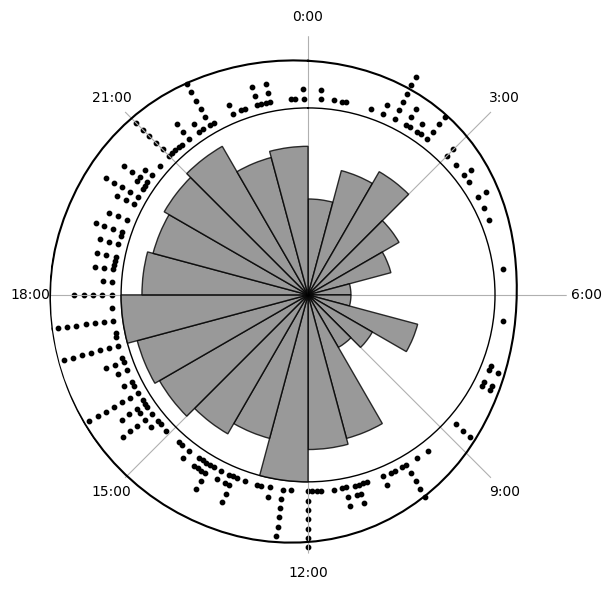

In [23]:
from pycircstat2.utils import time2float
d1 = time2float(load_data("B1", 'fisher')['time'].values)
c1 = Circular(data=d1, unit='hour')
c1.plot(
    config={
        "figsize": (6, 6),
        "rose": {"bins": 24},
        "density": True,
        "mean": False,
        "median": False,
    }
)

### Rayleigh's Test `rayleigh_test()`

In [24]:
from pycircstat2.hypothesis import rayleigh_test

# Difference between circular.R and pycircstat2
# The test statistics from circular.R is the mean resultant length (our c1.r)
# And their p-value is also computed differently. But both are valid.
res = rayleigh_test(r=c1.r, n=c1.n)
print(f"Test statistics: z = {res.z:.3f}; r = {c1.r:.3f}")
print(f"P-value = {res.pval}")

Test statistics: z = 26.437; r = 0.323
P-value = 1.6883289745372092e-12


### Ajne's A aka `omnibus_test()`

In [25]:
from pycircstat2.hypothesis import omnibus_test

A, pval = omnibus_test(c1.alpha)
print(f"Test statistics: A = {A:.3f}")
print(f"P-value = {pval}")

Test statistics: A = 0.272
P-value = 3.9016510340511927e-07


In [26]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-02-18 15:49:15CET

Python implementation: CPython
Python version       : 3.12.9
IPython version      : 8.31.0

numpy      : 2.2.2
matplotlib : 3.10.0
pycircstat2: 0.1.9
polars     : 1.21.0

Watermark: 2.5.0

